# Minicurso Classificadores

## Lição 2: Validando, avaliando e comparando...

### Reconhecendo números de 0 a 9 escritos a mão

#### Importando dependências e setup

In [1]:
# Import datasets, and ML algorithms
from sklearn import datasets, metrics

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, StratifiedKFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.ensemble import AdaBoostClassifier as AdaBoost, GradientBoostingClassifier as GradientBoosting

# Import numeric library
import numpy as np

# Import plotting library
import matplotlib.pyplot as plt

# Set plot to be show inside the notebook
%matplotlib inline

In [2]:
# Set the random seed to reproducibility
import random
random.seed(0)

#### Preparando os dados

In [3]:
digits = datasets.load_digits()

n_samples = len(digits.images)

X = digits.images.reshape((n_samples, -1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

#### Separando em Treinamento e Teste

Antes de separar a base, vamos criar uma função para visualizar a proporção de cada classe nas bases separadas:

In [5]:
def plot_proportion(y):
    uniques, counts = np.unique(y, return_counts=True)

    plt.barh(uniques, counts/len(y));

    plt.title('Samples of each class');
    plt.yticks(uniques);
    plt.ylabel('Classes');
    plt.xlabel('Proportion');

Na lição passada fizemos da forma abaixo:

X_train: 898 x 64
y_train: 898


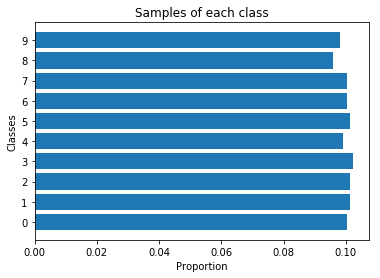

In [6]:
# We learn the digits on the first half of the digits
X_train = X[:n_samples // 2]
y_train = y[:n_samples // 2]

print('X_train: {} x {}'.format(*X_train.shape))
print('y_train: {}'.format(*y_train.shape))

plot_proportion(y_train)

X_test: 899 x 64
y_test: 899


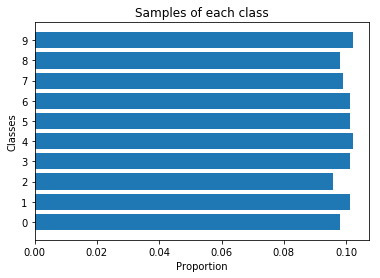

In [7]:
X_test = X[n_samples // 2:]
y_test = y[n_samples // 2:]

print('X_test: {} x {}'.format(*X_test.shape))
print('y_test: {}'.format(*y_test.shape))

plot_proportion(y_test)

Mas existem formas mais fáceis de fazer isto:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(898, 64) (898,)
(899, 64) (899,)


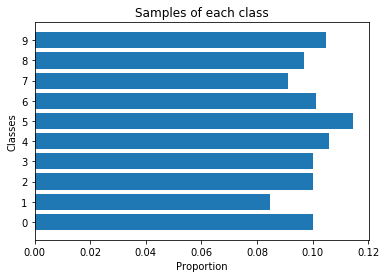

In [9]:
plot_proportion(y_train)

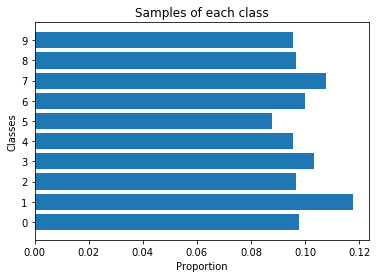

In [10]:
plot_proportion(y_test)

50% a 50%, está ficando pouco para o treinamento!

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # Valores comum: .2, .25 e .3.

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


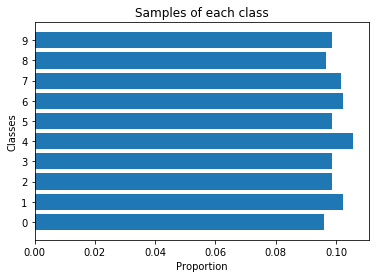

In [12]:
plot_proportion(y_train)

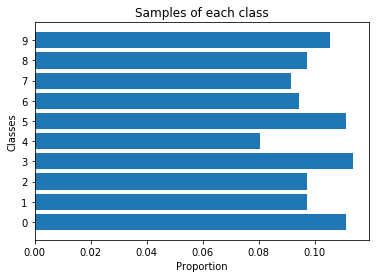

In [13]:
plot_proportion(y_test)

#### Treinando e Classificando

In [14]:
clf = SVC(gamma='scale')

clf.fit(X_train, y_train)

expected = y_test
predicted = clf.predict(X_test)
predicted

array([3, 3, 5, 5, 2, 0, 3, 8, 5, 0, 0, 0, 1, 3, 8, 2, 0, 2, 2, 3, 7, 0,
       7, 2, 1, 4, 4, 1, 5, 6, 6, 2, 3, 6, 2, 4, 1, 9, 7, 3, 6, 6, 0, 9,
       0, 9, 5, 9, 1, 5, 5, 9, 6, 0, 6, 5, 3, 0, 2, 7, 5, 3, 0, 8, 2, 9,
       0, 7, 5, 8, 9, 0, 3, 7, 6, 3, 2, 5, 1, 7, 1, 3, 4, 1, 8, 2, 9, 1,
       9, 3, 4, 4, 5, 0, 9, 3, 3, 0, 7, 9, 8, 5, 8, 9, 4, 5, 6, 8, 1, 0,
       1, 9, 9, 7, 2, 4, 5, 1, 3, 0, 5, 9, 9, 5, 6, 3, 1, 3, 1, 2, 1, 1,
       8, 0, 6, 2, 5, 1, 3, 5, 0, 9, 0, 3, 3, 9, 8, 4, 5, 3, 1, 1, 0, 6,
       4, 9, 0, 8, 0, 8, 5, 9, 4, 0, 4, 3, 5, 8, 8, 1, 9, 2, 9, 0, 1, 7,
       5, 0, 2, 8, 2, 3, 4, 6, 9, 4, 7, 8, 6, 8, 5, 2, 7, 9, 8, 5, 5, 5,
       7, 3, 1, 4, 5, 6, 4, 9, 7, 8, 1, 0, 0, 9, 8, 7, 9, 9, 0, 6, 8, 9,
       3, 5, 8, 9, 2, 4, 8, 7, 9, 2, 6, 9, 6, 8, 3, 3, 2, 0, 6, 3, 8, 2,
       1, 4, 7, 7, 4, 8, 4, 5, 2, 3, 0, 8, 6, 3, 7, 1, 8, 4, 2, 7, 9, 1,
       6, 3, 9, 3, 1, 5, 0, 1, 5, 7, 1, 3, 4, 3, 9, 9, 1, 0, 7, 9, 5, 5,
       2, 4, 6, 0, 8, 2, 7, 6, 9, 0, 2, 5, 9, 2, 4,

In [15]:
accuracy = metrics.accuracy_score(expected, predicted)
accuracy

0.9944444444444445

Uma outra forma de obter o score do classificador é:

In [16]:
clf.score(X_test, y_test)

0.9944444444444445

Podemos visualizar os acertos e erros com um gráfico de dispersão entre o esperado e o predito:

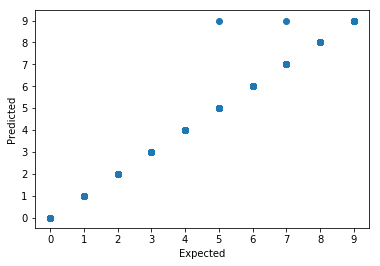

In [17]:
plt.scatter(expected, predicted)

plt.xlabel('Expected');
plt.xticks(digits.target_names);
plt.ylabel('Predicted');
plt.yticks(digits.target_names);

#### Melhorando a divisão das bases de teste e treino usando estratificação

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.20) # Valores comum: .2, .25 e .3.

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


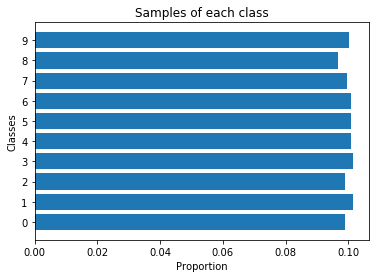

In [19]:
plot_proportion(y_train);

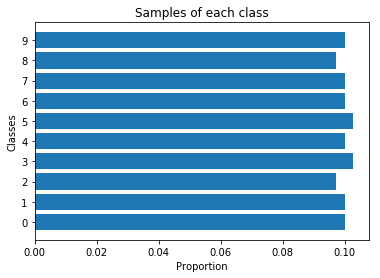

In [20]:
plot_proportion(y_test)

In [21]:
clf = SVC(gamma='scale')

clf.fit(X_train, y_train)

expected = y_test
predicted = clf.predict(X_test)

accuracy = metrics.accuracy_score(expected, predicted)
accuracy

0.9916666666666667

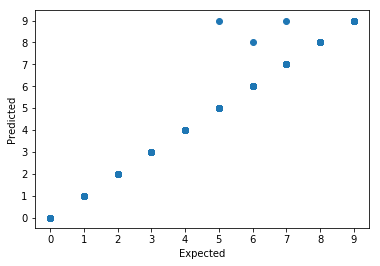

In [22]:
plt.scatter(expected, predicted)

plt.xlabel('Expected');
plt.xticks(digits.target_names);
plt.ylabel('Predicted');
plt.yticks(digits.target_names);

#### Fazendo melhor ainda - K-fold Cross-validation

![kfold](https://cdn-images-1.medium.com/max/720/1*J2B_bcbd1-s1kpWOu_FZrg.png)

*(Imagem obtida em: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)*

Primeiro vamos definir o classificador

In [23]:
clf = SVC(gamma='scale')

Agora podemos treina-lo e valida-lo utilizando a técninca de validação cruzada por K-folds ( *folds = dobras ;)* ):

In [24]:
cv_scores = cross_val_score(clf, X, y, cv=3)

display(cv_scores)
cv_scores.mean()

array([0.95016611, 0.96828047, 0.96644295])

0.9616298444742292

In [25]:
cv_scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')

display(cv_scores)
cv_scores.mean()

array([0.95016611, 0.96828047, 0.96644295])

0.9616298444742292

In [26]:
cv_scores = cross_val_score(clf, X, y, cv=3, scoring='f1_macro')

display(cv_scores)
cv_scores.mean()

array([0.95154219, 0.96835475, 0.96655357])

0.9621501707254922

Interessado em mais de uma métrica:

In [27]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(clf, X, y, scoring=scoring, cv=3, return_train_score=True)
scores

{'fit_time': array([0.23963356, 0.28075433, 0.23358417]),
 'score_time': array([0.20053363, 0.20851684, 0.20554829]),
 'test_accuracy': array([0.95016611, 0.96828047, 0.96644295]),
 'train_accuracy': array([1., 1., 1.]),
 'test_precision_macro': array([0.95933548, 0.96918181, 0.96752015]),
 'train_precision_macro': array([1., 1., 1.]),
 'test_recall_macro': array([0.95001616, 0.96815814, 0.96671571]),
 'train_recall_macro': array([1., 1., 1.]),
 'test_f1_macro': array([0.95154219, 0.96835475, 0.96655357]),
 'train_f1_macro': array([1., 1., 1.])}

In [28]:
for score in scores:
    score_tot = scores[score].mean()
    print('{}: {}'.format(score, round(score_tot, 2)))

fit_time: 0.25
score_time: 0.2
test_accuracy: 0.96
train_accuracy: 1.0
test_precision_macro: 0.97
train_precision_macro: 1.0
test_recall_macro: 0.96
train_recall_macro: 1.0
test_f1_macro: 0.96
train_f1_macro: 1.0


#### Comparando classificadores

Tornando a comparação justa:

In [29]:
models = {
    'SVM': SVC(gamma='scale'),
    'NB': GaussianNB()
    }

In [30]:
kfold = KFold(n_splits=3, shuffle=False)

for model in models:    
    cv_scores = cross_val_score(models[model], X, y, cv=kfold)
    print(model + ': ' + str(cv_scores.mean()*100) + '%')

SVM: 95.82637729549249%
NB: 81.19087367835282%


In [31]:
kfold = StratifiedKFold(n_splits=3, shuffle=False)

for model in models:    
    cv_scores = cross_val_score(models[model], X, y, cv=kfold)
    print(model + ': ' + str(cv_scores.mean()*100) + '%')

SVM: 96.16298444742291%
NB: 81.86003803550138%


Pondo em prática:

In [32]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=10000)))
models.append(('KNN', KNN()))
models.append(('CART', DecisionTree())) # Classification And Regression Tree
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForest(n_estimators=10)))
models.append(('ADA', AdaBoost()))
models.append(('GradB', GradientBoosting()))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=10000, multi_class='auto',
            n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', d

In [33]:
# evaluate each model
results = []
names = []
kfold = StratifiedKFold(n_splits=10)
for name, model in models:    
    cv_results = cross_validate(model, X, y, cv=kfold, scoring='accuracy', return_train_score=False)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results['test_score'].mean(), cv_results['test_score'].std())
    print(msg)

LR: 0.930466 (0.029047)
KNN: 0.973948 (0.016550)
CART: 0.826996 (0.030248)
NB: 0.810354 (0.056655)
SVM: 0.487052 (0.069361)
RF: 0.926109 (0.030566)
ADA: 0.269767 (0.036967)
GradB: 0.934359 (0.031626)


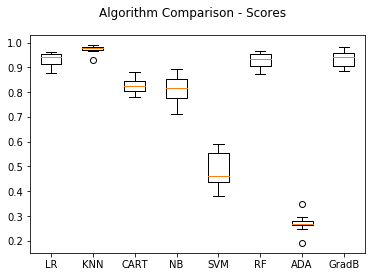

In [34]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Scores')
ax = fig.add_subplot(111)
score_results = [result['test_score'] for result in results]
plt.boxplot(score_results)
ax.set_xticklabels(names)
plt.show()

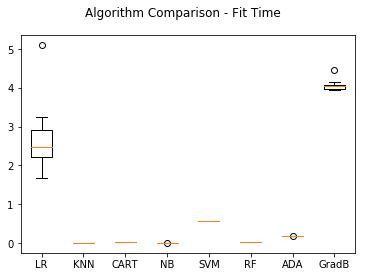

In [35]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Fit Time')
ax = fig.add_subplot(111)
score_results = [result['fit_time'] for result in results]
plt.boxplot(score_results)
ax.set_xticklabels(names)
plt.show()

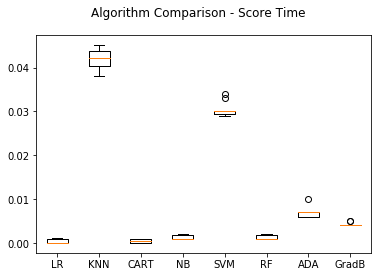

In [36]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Score Time')
ax = fig.add_subplot(111)
score_results = [result['score_time'] for result in results]
plt.boxplot(score_results)
ax.set_xticklabels(names)
plt.show()

---

### Para saber mais...

Dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

Outros datasets para treinar:
https://scikit-learn.org/stable/datasets/index.html

Cross-validation:
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Métricas de Avaliação: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Tutoriais que usei de base para esta lição:
- https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
- https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

### Dicas para execução

Uma forma bem simples de executar este Notebook é usando o Google Colab: https://colab.research.google.com/

Se for utilizar sua máquina, lembre de intalar o Python 3 (eu usei o 3.7) e as dependências:
- NumPy
- Scikit-learn
- Jupyter Notebook
- Matplotlib

Sugiro instalar tanto o python quanto as dependências via [Anaconda](https://www.anaconda.com/distribution/#download-section) (ou [MiniConda](https://conda.io/en/latest/miniconda.html)) criando um Environment.